In [1]:
# Вариант № 4
## Задача 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def get_omega(L, theta):
    omega = np.array([1/(L+1) for i in range(L+1)])
    for _ in range(100000):
        n_omega = omega @ theta
        omega = n_omega
    return omega

In [4]:
def get_params(L, lambd0, kappa, mu, theta, omega):
    lambd = np.zeros(L) # интенсивности приходов в системы
    psi = np.zeros(L) # коэффициенты использования систем
    P0 = np.zeros(L)
    b = np.zeros(L)
    h = np.zeros(L)
    n = np.zeros(L)
    u = np.zeros(L)
    tau = 0
    for i in range(1, len(omega)):
        lambd[i-1] = lambd0*(omega[i]/omega[0])
    for i in range(L):
        psi[i] = lambd[i]/(kappa[i]*mu[i])
    for i in range(L):
        sum = 0
        for j in range(int(kappa[i])):
            sum += (kappa[i]*psi[i])**j / math.factorial(j)
        P0[i] = ((kappa[i]*psi[i])**kappa[i]/
                       (math.factorial(kappa[i])*(1-psi[i]))+sum)**(-1)
        b[i] = P0[i]*(((kappa[i]**kappa[i])*(psi[i]**(kappa[i]+1)))/
                            (math.factorial(kappa[i])*((1-psi[i])**2)))
        h[i] = psi[i]*kappa[i]
        n[i] = b[i]+h[i]
        u[i] = n[i]/lambd[i]
        tau += lambd[i]*u[i]
    tau = (1/lambd0)*tau
    
    print('lambd0: ', lambd0)
    print('lambdas: ', lambd)
    print('psi: ', psi)
    print('м.о. требований в системах: ', b)
    print('м.о. длительности пребывания: ', tau)
    print('*'*100)
    return [tau, b]

In [5]:
L = 6 # число приборов
lambd0 = 3 # интенсивность поступления
kappa = np.ones(L) # количество приборов в i-ой системе
mu = np.linspace(3, 6, 6)
theta = np.array([[0, 0.5, 0.3, 0.2, 0, 0, 0],
                  [0, 0, 0.4, 0, 0.6, 0, 0],
                  [0, 0, 0, 0.3, 0, 0.7, 0],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0.8, 0.2],
                  [0, 0, 0, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0, 0]]) # маршрутная матрица

omega = get_omega(L, theta)
print('Стационарное решение: ', omega, '\nПроверка: ', sum(omega))
print('*'*100)
print('Решение для параметров по-умолчанию')
get_params(L, lambd0, kappa, mu, theta, omega)

Стационарное решение:  [0.21786492 0.10893246 0.10893246 0.07625272 0.06535948 0.20479303
 0.21786492] 
Проверка:  0.9999999999999973
****************************************************************************************************
Решение для параметров по-умолчанию
lambd0:  3
lambdas:  [1.5  1.5  1.05 0.9  2.82 3.  ]
psi:  [0.5        0.41666667 0.25       0.1875     0.52222222 0.5       ]
м.о. требований в системах:  [0.5        0.29761905 0.08333333 0.04326923 0.57080103 0.5       ]
м.о. длительности пребывания:  1.4571371780674105
****************************************************************************************************


[1.4571371780674105,
 array([0.5       , 0.29761905, 0.08333333, 0.04326923, 0.57080103,
        0.5       ])]

lambd0:  0.05
lambdas:  [0.025  0.025  0.0175 0.015  0.047  0.05  ]
psi:  [0.00833333 0.00694444 0.00416667 0.003125   0.0087037  0.00833333]
м.о. требований в системах:  [7.00280112e-05 4.85625486e-05 1.74337517e-05 9.79623824e-06
 7.64195916e-05 7.00280112e-05]
м.о. длительности пребывания:  0.7979749926817116
****************************************************************************************************
lambd0:  0.1
lambdas:  [0.05  0.05  0.035 0.03  0.094 0.1  ]
psi:  [0.01666667 0.01388889 0.00833333 0.00625    0.01740741 0.01666667]
м.о. требований в системах:  [2.82485876e-04 1.95618153e-04 7.00280112e-05 3.93081761e-05
 3.08386034e-04 2.82485876e-04]
м.о. длительности пребывания:  0.8039127508902484
****************************************************************************************************
lambd0:  0.15000000000000002
lambdas:  [0.075  0.075  0.0525 0.045  0.141  0.15  ]
psi:  [0.025      0.02083333 0.0125     0.009375   0.02611111 0.025     ]
м.о. требований в си

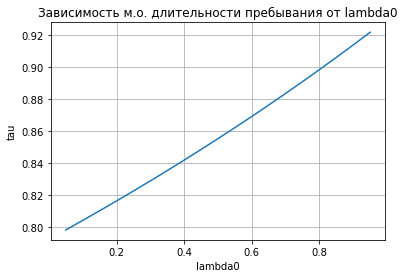

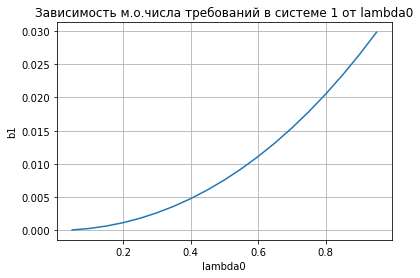

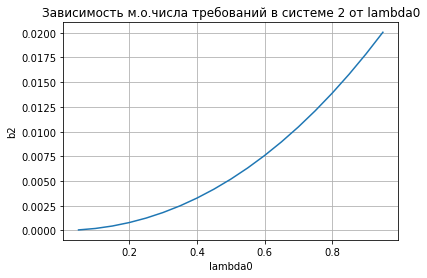

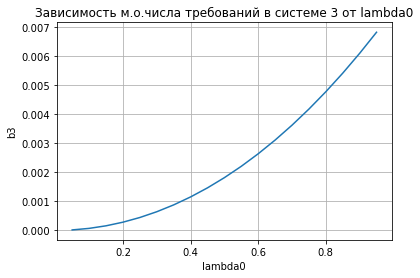

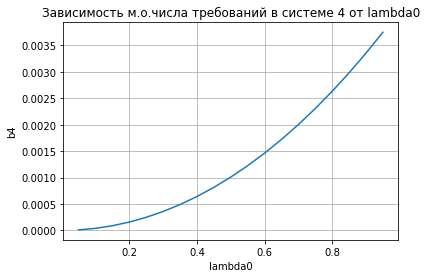

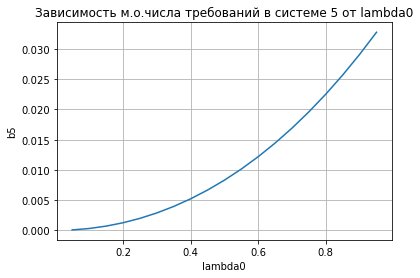

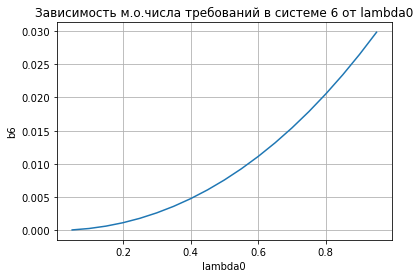

In [6]:
# Меняем lambd0
lambd0_to_change = np.arange(0.05, 1, 0.05)

tau = np.zeros(len(lambd0_to_change))
b = np.zeros((len(lambd0_to_change),L))

for i in range(len(lambd0_to_change)):
    date_t, date_b = get_params(L, lambd0_to_change[i], kappa, mu, theta, omega)
    tau[i] = date_t
    for j in range(L):
        b[i,j] = date_b[j]
    
# Построение графика tau от lambda
plt.plot(lambd0_to_change, tau)
plt.title('Зависимость м.о. длительности пребывания от lambda0')
plt.xlabel('lambda0')
plt.ylabel('tau')
plt.grid()
plt.show()

# Построение графиков b от lambda
plt.plot(lambd0_to_change, b[:,0])
plt.title(f'Зависимость м.о.числа требований в системе 1 от lambda0')
plt.xlabel('lambda0')
plt.ylabel(f'b1')
plt.grid()
plt.show()

plt.plot(lambd0_to_change, b[:,1])
plt.title(f'Зависимость м.о.числа требований в системе 2 от lambda0')
plt.xlabel('lambda0')
plt.ylabel(f'b2')
plt.grid()
plt.show()

plt.plot(lambd0_to_change, b[:,2])
plt.title(f'Зависимость м.о.числа требований в системе 3 от lambda0')
plt.xlabel('lambda0')
plt.ylabel(f'b3')
plt.grid()
plt.show()

plt.plot(lambd0_to_change, b[:,3])
plt.title(f'Зависимость м.о.числа требований в системе 4 от lambda0')
plt.xlabel('lambda0')
plt.ylabel(f'b4')
plt.grid()
plt.show()

plt.plot(lambd0_to_change, b[:,4])
plt.title(f'Зависимость м.о.числа требований в системе 5 от lambda0')
plt.xlabel('lambda0')
plt.ylabel(f'b5')
plt.grid()
plt.show()

plt.plot(lambd0_to_change, b[:,5])
plt.title(f'Зависимость м.о.числа требований в системе 6 от lambda0')
plt.xlabel('lambda0')
plt.ylabel(f'b6')
plt.grid()
plt.show()

lambd0:  3
lambdas:  [1.5  1.5  1.05 0.9  2.82 3.  ]
psi:  [0.5        0.41666667 0.25       0.1875     0.52222222 0.75      ]
м.о. требований в системах:  [0.5        0.29761905 0.08333333 0.04326923 0.57080103 2.25      ]
м.о. длительности пребывания:  2.123803844734077
****************************************************************************************************
lambd0:  3
lambdas:  [1.5  1.5  1.05 0.9  2.82 3.  ]
psi:  [0.5        0.41666667 0.25       0.1875     0.52222222 0.73109244]
м.о. требований в системах:  [0.5        0.29761905 0.08333333 0.04326923 0.57080103 1.98765756]
м.о. длительности пребывания:  2.030053844734077
****************************************************************************************************
lambd0:  3
lambdas:  [1.5  1.5  1.05 0.9  2.82 3.  ]
psi:  [0.5        0.41666667 0.25       0.1875     0.52222222 0.71311475]
м.о. требований в системах:  [0.5        0.29761905 0.08333333 0.04326923 0.57080103 1.77259953]
м.о. длительности пребывания

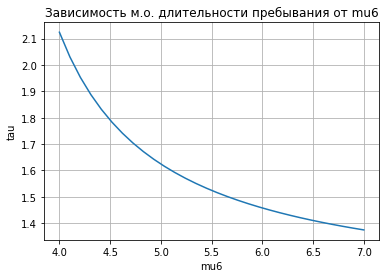

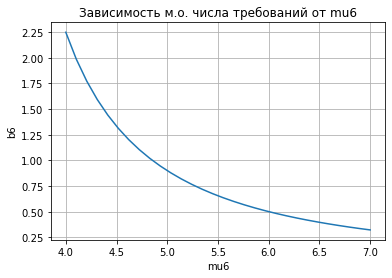

In [7]:
# Меняем mu6
mu6 = np.linspace(4, 7, 30)
tau = np.zeros(len(mu6))
b = np.zeros((len(mu6),L))
for i in range(len(mu6)):
    mu[5] = mu6[i]
    date_t, date_b = get_params(L, lambd0, kappa, mu, theta, omega)
    tau[i] = date_t
    for j in range(L):
        b[i,j] = date_b[j]
# Построение графиков
plt.plot(mu6, tau)
plt.title('Зависимость м.о. длительности пребывания от mu6')
plt.xlabel('mu6')
plt.ylabel('tau')
plt.grid()
plt.show()

plt.plot(mu6, b[:,5])
plt.title('Зависимость м.о. числа требований от mu6')
plt.xlabel('mu6')
plt.ylabel('b6')
plt.grid()
plt.show()